# practice using Pytorch with Logistic regression

In [18]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
# load data
train = pd.read_csv('data/train.csv', dtype=np.float32)

# split data into pixels and labels  (our features are the pixels)
targets_numpy = train['label'].values

# features will be all categories except our target, and then standardize all values
features_numpy = train.loc[:, train.columns != 'label'].values / 255

X_train, X_test, y_train, y_test = train_test_split(features_numpy, targets_numpy, test_size=0.2, random_state=42)


In [15]:
X_train_tensor = torch.from_numpy(X_train)
# convert target to type long
y_train_tensor = torch.from_numpy(y_train).type(torch.LongTensor)

X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test).type(torch.LongTensor)

In [28]:
# batch size, epoch, and iterations

batch_size = 100
n_iters = 10000
epochs = int(n_iters / (len(X_train) / batch_size))
epochs

29

In [16]:
# pytorch train and test sets
train = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

In [17]:
# data loader
train_loader = DataLoader(train, batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size, shuffle=False)

(-0.5, 27.5, 27.5, -0.5)

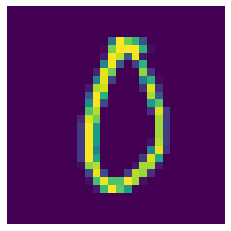

In [25]:
# visualize an image in dataset
plt.imshow(features_numpy[69].reshape(28,28))
plt.axis('off')

In [26]:
# create regression model

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()

        ## linear layer
        self.linear = nn.Linear(input_dim, output_dim)

        ## we place a logistic layer later

    def forward(self, x):
        return self.linear(x)


In [29]:
# size of image px by px
input_dim = 28*28
# we 0-9 labels
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [32]:
# train the model
count = 0
loss_list = []
iteration_list = []
for epoch in range(epochs):
    for i, (image, labels) in enumerate(train_loader):
        # Define variables
        train = Variable(image.view(-1, 28 * 28))
        labels = Variable(labels)

        # clear gradients after each iter
        optimizer.zero_grad()

        #fp
        outputs = model(train)

        # loss func
        loss = criterion(outputs, labels)

        # bp
        loss.backward()

        #update
        optimizer.step()

        count+=1

         # Prediction
        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))

                # Forward propagation
                outputs = model(test)

                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]

                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))



Iteration: 500  Loss: 1.8434792757034302  Accuracy: 65.02381134033203%
Iteration: 1000  Loss: 1.6226650476455688  Accuracy: 74.36904907226562%
Iteration: 1500  Loss: 1.2879797220230103  Accuracy: 78.26190185546875%
Iteration: 2000  Loss: 1.1992069482803345  Accuracy: 79.91666412353516%
Iteration: 2500  Loss: 1.0462743043899536  Accuracy: 81.05952453613281%
Iteration: 3000  Loss: 0.9324048757553101  Accuracy: 82.01190185546875%
Iteration: 3500  Loss: 0.9103773236274719  Accuracy: 82.61904907226562%
Iteration: 4000  Loss: 0.75664883852005  Accuracy: 83.07142639160156%
Iteration: 4500  Loss: 0.9632409811019897  Accuracy: 83.42857360839844%
Iteration: 5000  Loss: 0.8143795132637024  Accuracy: 83.75%
Iteration: 5500  Loss: 0.7567724585533142  Accuracy: 84.04762268066406%
Iteration: 6000  Loss: 0.872061550617218  Accuracy: 84.44047546386719%
Iteration: 6500  Loss: 0.6622310876846313  Accuracy: 84.60713958740234%
Iteration: 7000  Loss: 0.7113801836967468  Accuracy: 84.8452377319336%
Iteration